## Predicto api - Follow Nasdaq-100 Signals
Sample usage to retrieve latest Predicto Nasdaq-100 Signals programmatically.
For more details check: https://predic.to/outlook

To use predicto api and reproduce this notebook, you'll need to have a valid Predicto account. 
If you don't have one, you can create one here: https://predic.to and get a free trial period.

To authenticate you'll need an api key. To retrieve it, login to https://predic.to and head to your [settings page](https://predic.to/account). Then paste it in the `predicto_api_key` variable below.

If you get any exception/error while running below code, please make sure your api key is correct and your subscription/trial is not expired.
Please note that there is a limit to the number of requests you can make per minute, depending on your account type.

### Import needed packages

In [1]:
import sys
sys.path.append("../predicto_api/")

import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import IPython.display as display

from predicto_api_wrapper import PredictoApiWrapper, TradeAction

### Prepare and initialize our Predicto wrapper
You'll need to have a valid Predicto account as mentioned above, and get an api key. Then replace the `predicto_api_key` variable below

In [7]:
predicto_api_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
predicto_api_wrapper = PredictoApiWrapper(predicto_api_key)

### Let's plot the Nasdaq Outlook Score  for the last 20 days
More info about this: https://predic.to/faq#noslink

In [3]:
# set some generic params here
go_back_days = 20
since_date = (datetime.today() - timedelta(days=20)).strftime('%Y-%m-%d')

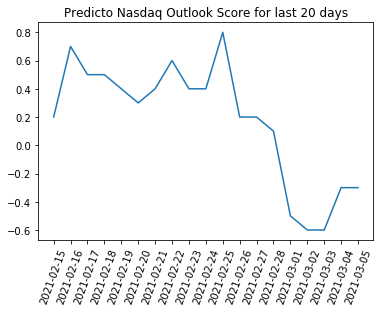

In [4]:
# retrieve from api
outlook_json = predicto_api_wrapper.get_nasdaq_outlook_score_since(since_date)
outlook_df = pd.DataFrame.from_dict(outlook_json).set_index('SDate')

# plot it
plt.title("Predicto Nasdaq Outlook Score for last {0} days".format(go_back_days))
plt.xticks(rotation=70)
plt.plot(outlook_df.Score)

### Let's plot the Nasdaq Forecasted Volatility for the last 15 days
More info about this: https://predic.to/faq#volatilitylink

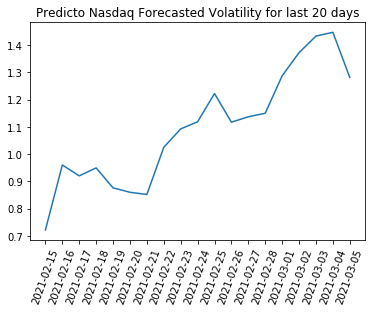

In [5]:
# retrieve from api
outlook_json = predicto_api_wrapper.get_nasdaq_forecasted_volatility_since(since_date)
outlook_df = pd.DataFrame.from_dict(outlook_json).set_index('SDate')

# plot it
plt.title("Predicto Nasdaq Forecasted Volatility for last {0} days".format(go_back_days))
plt.xticks(rotation=70)
plt.plot(outlook_df.Score)

### Let's plot the Nasdaq Models Uncertainty for the last 15 days
More info about this: https://predic.to/faq#uncertaintylink

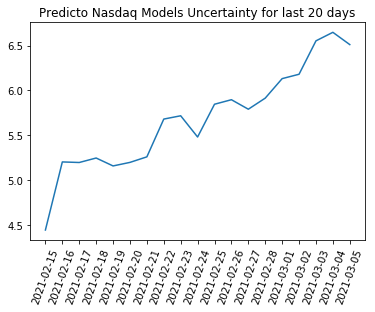

In [6]:
# retrieve from api
outlook_json = predicto_api_wrapper.get_nasdaq_models_uncertainty_since(since_date)
outlook_df = pd.DataFrame.from_dict(outlook_json).set_index('SDate')

# plot it
plt.title("Predicto Nasdaq Models Uncertainty for last {0} days".format(go_back_days))
plt.xticks(rotation=70)
plt.plot(outlook_df.Score)